<a href="https://colab.research.google.com/github/jojoroy/Parkinsons-model/blob/main/pkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://challengedata.ens.fr/participants/challenges/159/submissions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
X=pd.read_csv('/content/drive/MyDrive/challenge_1/X_train_6ZIKlTY.csv')

In [ ]:
X.head()

,Index,patient_id,cohort,sexM,gene,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off
0,0,IPLP5212,A,0,LRRK2+,48.5,52.1,607.0,1.9,NaN,7.0,NaN
1,1,IPLP5212,A,0,LRRK2+,48.5,53.0,666.0,1.9,17.6,12.0,44.0
2,2,IPLP5212,A,0,LRRK2+,48.5,53.9,717.0,1.2,NaN,6.0,NaN
3,3,IPLP5212,A,0,LRRK2+,48.5,54.8,770.0,1.5,NaN,11.0,NaN
4,4,IPLP5212,A,0,LRRK2+,48.5,56.9,885.0,0.3,NaN,24.0,NaN


[]

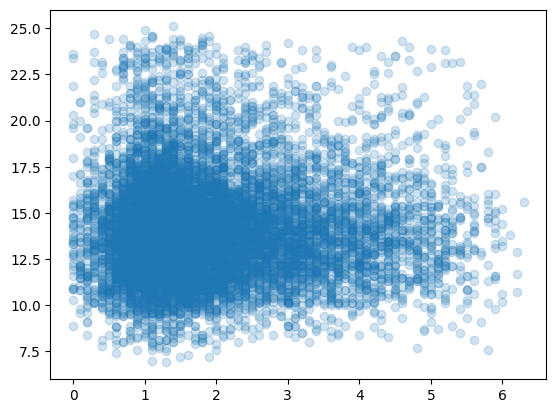

In [ ]:
# @title age_at_diagnosis


plt.scatter(X['time_since_intake_on'],X['time_since_intake_off'],alpha=0.2)
plt.plot()

In [ ]:
X.describe()

,Index,sexM,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off
count,55603.000000,55603.000000,52773.000000,55603.000000,35010.000000,29663.000000,11775.000000,38944.000000,32196.000000
mean,27801.000000,0.596353,56.734648,62.516422,638.102228,1.953717,14.199448,21.985980,26.295316
std,16051.347846,0.490633,10.823093,11.484480,219.443182,1.168793,2.844782,10.371291,16.534567
min,0.000000,0.000000,16.500000,16.500000,50.000000,0.000000,6.900000,0.000000,0.000000
25%,13900.500000,0.000000,49.500000,54.900000,481.000000,1.100000,12.200000,14.000000,13.000000
50%,27801.000000,1.000000,56.900000,62.500000,611.000000,1.600000,13.800000,21.000000,24.000000
75%,41701.500000,1.000000,64.400000,70.500000,765.000000,2.600000,15.700000,28.000000,38.000000
max,55602.000000,1.000000,89.900000,103.300000,1796.000000,6.300000,25.100000,95.000000,106.000000


In [ ]:
X.isnull().sum()

,0
Index,0
patient_id,0
cohort,0
sexM,0
gene,17958
age_at_diagnosis,2830
age,0
ledd,20593
time_since_intake_on,25940
time_since_intake_off,43828


In [ ]:
X['gene'].unique()

array(['LRRK2+', 'No Mutation', nan, 'GBA+', 'OTHER+'], dtype=object)

## y

In [3]:
y=pd.read_csv('/content/drive/MyDrive/challenge_1/y_train_lXj6X5y.csv',index_col='Index')

In [ ]:
y.describe()

,target
count,55603.000000
mean,37.331606
std,16.504326
min,0.000000
25%,25.400000
50%,37.100000
75%,49.200000
max,109.500000


In [4]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [6]:
X1=X[['sexM',	'age_at_diagnosis', 'age','ledd','time_since_intake_on',	'time_since_intake_off','on',	'off']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.25, random_state=42)

In [21]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [22]:
pred=model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [24]:
root_mean_squared_error(pred,y_test)

7.233274936676025

In [25]:
import shap

100%|===================| 13897/13901 [01:15<00:00]       

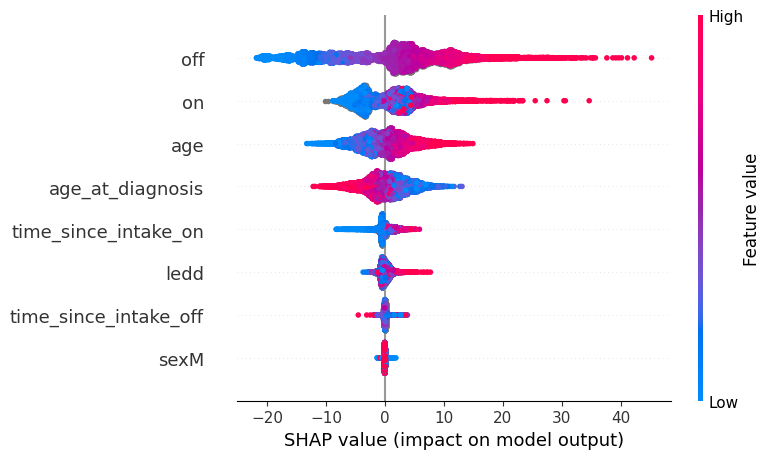

In [26]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test)

In [ ]:
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to test
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
model = XGBRegressor(**random_search.best_params_, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgbpreds=model.predict(X_test)

In [ ]:
root_mean_squared_error(xgbpreds,y_test)

7.2187066078186035

## mixed model

In [10]:
from statsmodels.formula.api import mixedlm

X1['y']=y



<ipython-input-10-d2e45f482d28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['y']=y


In [18]:
!pip install pymer4

In [19]:
from pymer4.models import Lmer

In [20]:
# Fit a basic LMM
#model = mixedlm("y~ age_at_diagnosis + age+ledd+time_since_intake_on+time_since_intake_off+on+off", X1, groups="sexM")
model = Lmer("y~ age_at_diagnosis + age+ledd+time_since_intake_on+time_since_intake_off+on+off", X1)
model.fit(REML=True)

PackageNotInstalledError: The R package "lmerTest" is not installed.